# 마켓과 머신러닝

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/glasslego/ml-deep-learning-study/blob/main/src/notebook/1-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 생선 분류 문제

### 도미 데이터 준비하기

In [1]:
import pandas as pd

fish_df = pd.read_csv('fish.csv')

# 도미(Bream) 데이터 추출
bream_data = fish_df[fish_df['Species'] == 'Bream']
bream_length = bream_data['Length'].tolist()
bream_weight = bream_data['Weight'].tolist()

print(f"도미 데이터 개수: {len(bream_data)}")
print(f"길이: {bream_length}")
print(f"무게: {bream_weight}")

도미 데이터 개수: 35
길이: [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
무게: [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


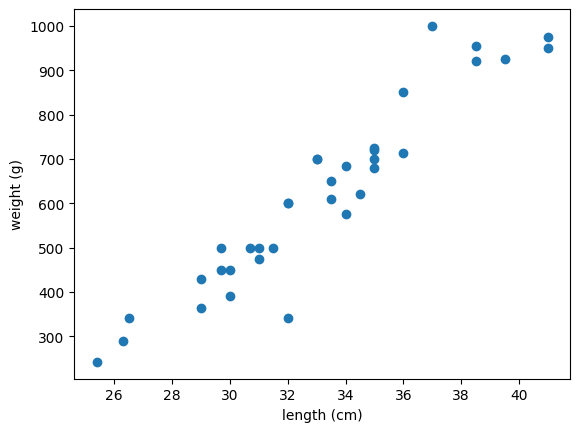

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length (cm)')
plt.ylabel('weight (g)')
plt.show()

### 빙어 데이터 준비하기

In [3]:
# 빙어(Smelt) 데이터 추출
smelt_data = fish_df[fish_df['Species'] == 'Smelt']
smelt_length = smelt_data['Length'].tolist()
smelt_weight = smelt_data['Weight'].tolist()

print(f"빙어 데이터 개수: {len(smelt_data)}")
print(f"길이: {smelt_length}")
print(f"무게: {smelt_weight}")

빙어 데이터 개수: 14
길이: [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
무게: [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


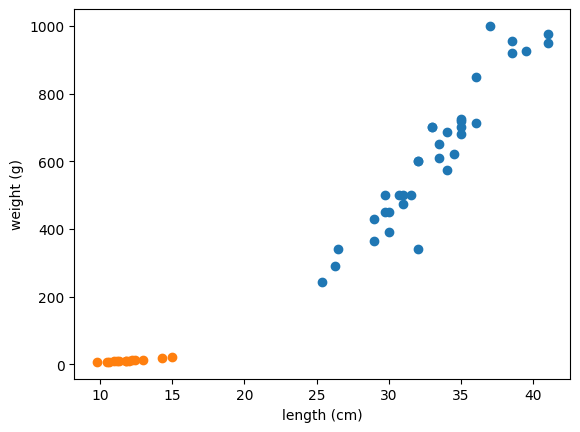

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length (cm)')
plt.ylabel('weight (g)')
plt.show()

## 첫 번째 머신러닝 프로그램

In [5]:
import numpy as np

bream_data = np.c_[bream_weight, bream_length]
len(bream_data)

35

In [6]:
bream_data[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [7]:
smelt_data = np.c_[smelt_weight, smelt_length]
len(smelt_data)

14

In [8]:
smelt_data[:5]

array([[ 6.7,  9.8],
       [ 7.5, 10.5],
       [ 7. , 10.6],
       [ 9.7, 11. ],
       [ 9.8, 11.2]])

In [9]:
fish_data = np.r_[bream_data, smelt_data]
len(fish_data)

49

In [10]:
fish_data[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [11]:
num_bream = len(bream_data)
num_smelt = len(smelt_data)
fish_label = np.array([1] * num_bream + [0] * num_smelt)
fish_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kn = KNeighborsClassifier()

In [14]:
kn.fit(X=fish_data, y=fish_label)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
kn._fit_X[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [17]:
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

### k-최근접 이웃 알고리즘

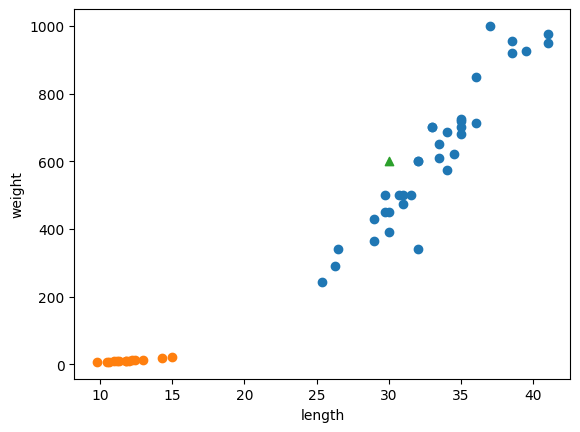

In [18]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
kn.predict([[30, 600]])

array([0])

In [20]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [21]:
kn49.fit(X=fish_data, y=fish_label)
kn49.score(fish_data, fish_label)

0.7142857142857143

In [22]:
print(35/49)

0.7142857142857143


### 확인 문제

In [23]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_label)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(X=fish_data, y=fish_label)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939


KNN의 `score()` 메서드가 계산하는 정확도(accuracy)

#### KNN Score 계산 공식

#### 정확도 (Accuracy)

$$\text{Accuracy} = \frac{\text{올바르게 예측한 샘플 수}}{\text{전체 샘플 수}} = \frac{\sum_{i=1}^{n} \mathbb{1}(y_i = \hat{y}_i)}{n}$$

여기서:
- $n$ : 전체 샘플(데이터) 개수
- $y_i$ : 실제 레이블 (정답)
- $\hat{y}_i$ : 모델이 예측한 레이블
- $\mathbb{1}(\cdot)$ : 지시 함수 (조건이 참이면 1, 거짓이면 0)

#### 단계별 계산 과정

1. **각 샘플 예측**
   - 입력 데이터의 각 샘플에 대해
   - k개의 최근접 이웃을 찾음
   - 다수결 투표로 클래스 결정

2. **정확도 계산**
   $$\text{Score} = \frac{\text{correct predictions}}{\text{total predictions}}$$

#### 예시

만약 물고기 데이터가 10마리이고:
- 9마리를 올바르게 분류 ✓
- 1마리를 잘못 분류 ✗

$$\text{Score} = \frac{9}{10} = 0.9 \text{ (90%)}$$

#### 코드에서의 의미

```python
score = kn.score(X=fish_data, y=fish_label)
```

이것은 다음과 같이 동작:

$$\text{score} = \frac{1}{N}\sum_{i=1}^{N} \mathbb{1}(\text{kn.predict}(x_i) = y_i)$$

- $N$ = `len(fish_data)`
- 각 `fish_data[i]`를 예측하고 `fish_label[i]`와 비교
- 일치하는 비율을 반환 (0.0 ~ 1.0)